### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

### Loading Datasets

In [2]:
customers = pd.read_csv('QVI_purchase_behaviour.csv')
transactions = pd.read_excel('QVI_transaction_data.xlsx')

### Data Cleaning (Customer Table)

In [3]:
# Looking for Null Entries
print("###### Customers Table Information ######")
print(customers.info())
# Examining Numeric Columns
print("###### Customers Table Description #####")
print(customers.describe())

###### Customers Table Information ######
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
###### Customers Table Description #####
       LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06


In [4]:
# Seeing how many unique numbers of Loyalty Card are there in the dataset
print("Unique Loyalty Card Numbers :", customers.loc[:,"LYLTY_CARD_NBR"].nunique())
# Seeing number of unique entries in Lifestge column in the dataset
print("Unique number of Lifestages values :",customers.loc[:,"LIFESTAGE"].nunique())

Unique Loyalty Card Numbers : 72637
Unique number of Lifestages values : 7


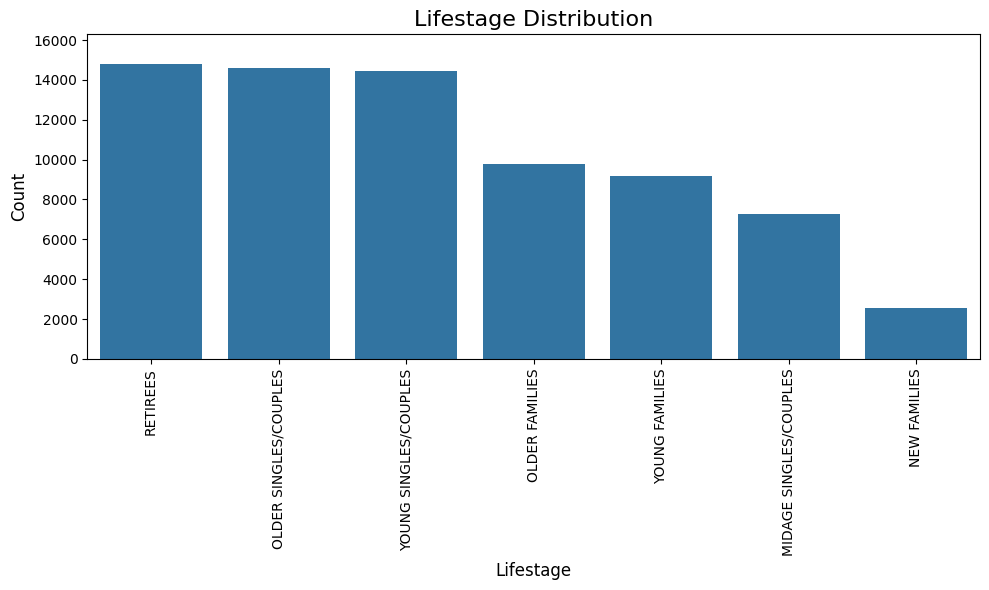

In [5]:
# Visualizing the Lifestage Distribution through Bar Chart
lifestage_type_counts = customers.loc[:,"LIFESTAGE"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=lifestage_type_counts.index, y=lifestage_type_counts.values)
plt.title('Lifestage Distribution', fontsize=16)
plt.xlabel('Lifestage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0, max(lifestage_type_counts.values) * 1.1)
plt.tight_layout()
plt.show()

In [6]:
# Seeing number of unique entries in Premium Customer column in the dataset
print("Unique number of premium customer values :",customers.loc[:,"PREMIUM_CUSTOMER"].nunique())

Unique number of premium customer values : 3


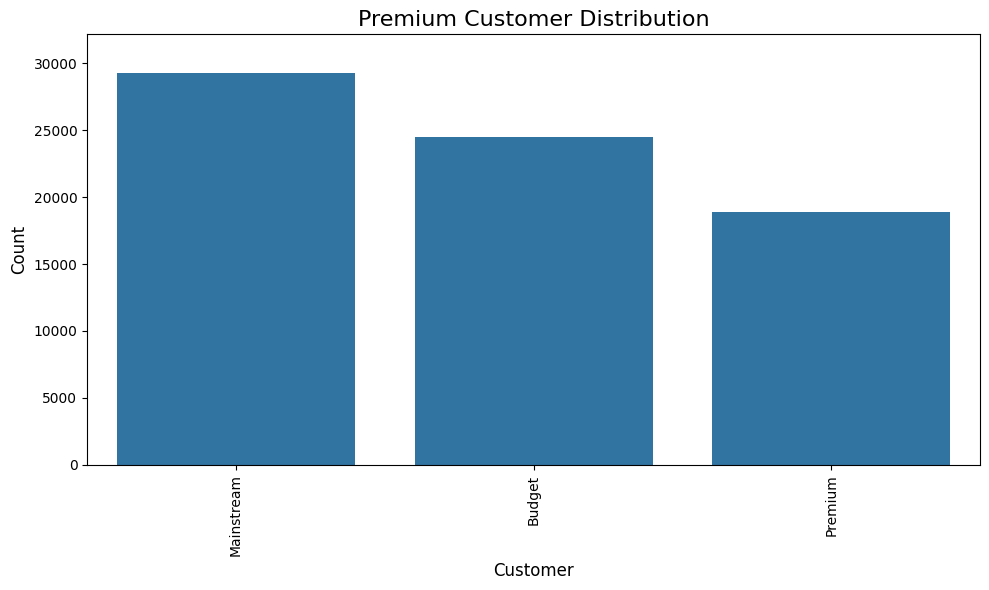

In [7]:
# Visualizing the Premium Custoomers Distribution through Bar Chart
premium_customer_counts = customers.loc[:,"PREMIUM_CUSTOMER"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=premium_customer_counts.index, y=premium_customer_counts.values)
plt.title('Premium Customer Distribution', fontsize=16)
plt.xlabel('Customer', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0, max(premium_customer_counts.values) * 1.1)
plt.tight_layout()
plt.show()

In [8]:
# Analyzing relationship between Lifestage column and Premium Customer column
print("###### Analyzing relationship between lifestage and premium customer ######")
print(pd.crosstab(customers.LIFESTAGE, customers.PREMIUM_CUSTOMER))

###### Analyzing relationship between lifestage and premium customer ######
PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
MIDAGE SINGLES/COUPLES    1504        3340     2431
NEW FAMILIES              1112         849      588
OLDER FAMILIES            4675        2831     2274
OLDER SINGLES/COUPLES     4929        4930     4750
RETIREES                  4454        6479     3872
YOUNG FAMILIES            4017        2728     2433
YOUNG SINGLES/COUPLES     3779        8088     2574


### Data Cleaning (Transaction Table)

In [9]:
# Looking for Null Entries
print("###### Transactions table information ######")
print(transactions.info())
# Examining Numeric Columns
print("###### Transactions Table Description #####")
print(transactions.describe())

###### Transactions table information ######
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
###### Transactions Table Description #####
                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
m

In [10]:
# Converting Date column of Excel sheet to date time object
transactions_date = pd.to_datetime('1899-12-30') + pd.to_timedelta(transactions.loc[:,"DATE"], unit='D')
# Seeing number of unique Dates
print("Number of unique transaction dates :",transactions_date.nunique())
# As of previous cell we see one missing date, hence getting the date which is missing in the dataset
startdate = transactions_date.min()
date_range = np.arange(startdate, startdate+np.timedelta64(365, "D"), dtype="datetime64[D]")
print("Date which was missing :",date_range[~np.isin(date_range, transactions_date.unique())])

Number of unique transaction dates : 364
Date which was missing : ['2018-12-25']


In [11]:
# Seeing number of unique product names
print("Number of unique product names :",transactions.loc[:,"STORE_NBR"].nunique())
# Seeing number of unique loyalty card number
print("Number of unique loyalty card number :",transactions.loc[:,"LYLTY_CARD_NBR"].nunique())
# Seeing number of unique transactions
print("Number of unique transactions :",transactions.loc[:,"TXN_ID"].nunique())

Number of unique product names : 272
Number of unique loyalty card number : 72637
Number of unique transactions : 263127


###### Description of product quantity bought ######
count    264836.000000
mean          1.907309
std           0.643654
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64


<Axes: xlabel='PROD_QTY'>

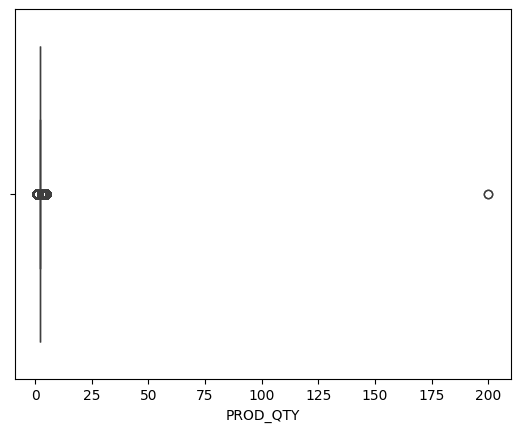

In [12]:
# Examining Product quantity bought
print("###### Description of product quantity bought ######")
print(transactions.loc[:,'PROD_QTY'].describe())
# As of previous cell you can see there is a max buy of 200 chips packets which can be 
# potential of outlier, hence visualizing it
sns.boxplot(x = transactions.loc[:,'PROD_QTY'])

In [13]:
# Removing this outlier 
transactions = transactions[transactions.loc[:,"PROD_QTY"] != 200]

###### Description of product quantity bought ######
count    264834.000000
mean          1.905813
std           0.343436
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           5.000000
Name: PROD_QTY, dtype: float64


<Axes: xlabel='PROD_QTY'>

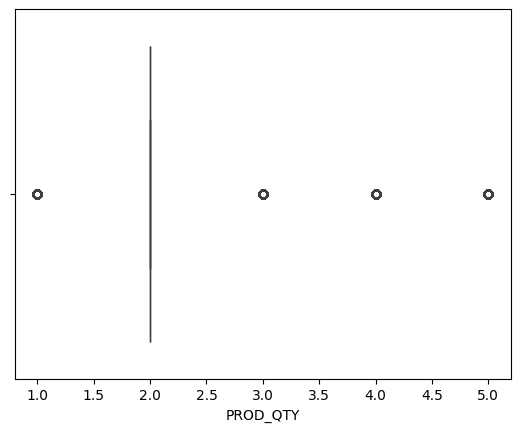

In [14]:
# Re Examining the Product Quantity column
print("###### Description of product quantity bought ######")
print(transactions.loc[:,'PROD_QTY'].describe())
# Re Visualizing the Product  Quantity column
sns.boxplot(x = transactions.loc[:,'PROD_QTY'])

In [15]:
# Extracting Brand names
transactions.loc[:,'BRAND_NAME'] = transactions.loc[:,'PROD_NAME'].str.split().str[0]
print("###### Distribution of Brand Name ######")
print(transactions.loc[:,'BRAND_NAME'].value_counts())

###### Distribution of Brand Name ######
BRAND_NAME
Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64


In [16]:
# Remove all special characters from 'PROD_NAME' (keeping only alphanumeric characters and spaces)
transactions.loc[:,"PROD_NAME"] = transactions.loc[:,"PROD_NAME"].str.replace(r'[^A-Za-z0-9\s]', '', regex=True)
print("###### Distribution of Product Name ######")
print(transactions.loc[:,"PROD_NAME"].value_counts())

###### Distribution of Product Name ######
PROD_NAME
Kettle Mozzarella   Basil  Pesto 175g      3304
Kettle Tortilla ChpsHnyJlpno Chili 150g    3296
Cobs Popd SwtChlli SrCream Chips 110g      3269
Tyrrells Crisps     Ched  Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g             3265
                                           ... 
RRD Pc Sea Salt     165g                   1431
Woolworths Medium   Salsa 300g             1430
NCC Sour Cream     Garden Chives 175g      1419
French Fries Potato Chips 175g             1418
WW Crinkle Cut      Original 175g          1410
Name: count, Length: 114, dtype: int64


In [17]:
# Extracting all the products which are salsa and eliminating all the salsa products from the table
salsa_products = transactions.loc[:,"PROD_NAME"].str.lower().str.contains("salsa")
transactions = transactions[~salsa_products]
print("###### Distribution of Product Name after removing Salsa Products ######")
print(transactions.loc[:,"PROD_NAME"].value_counts())

###### Distribution of Product Name after removing Salsa Products ######
PROD_NAME
Kettle Mozzarella   Basil  Pesto 175g      3304
Kettle Tortilla ChpsHnyJlpno Chili 150g    3296
Cobs Popd SwtChlli SrCream Chips 110g      3269
Tyrrells Crisps     Ched  Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g             3265
                                           ... 
Sunbites Whlegrn    Crisps FrchOnin 90g    1432
RRD Pc Sea Salt     165g                   1431
NCC Sour Cream     Garden Chives 175g      1419
French Fries Potato Chips 175g             1418
WW Crinkle Cut      Original 175g          1410
Name: count, Length: 105, dtype: int64


In [18]:
# Extracting Size of packets
transactions.loc[:,'SIZE'] = transactions.loc[:,'PROD_NAME'].str.extract(r'(\d+)')
# Examining the Size of packets
print("###### Distribution of packet Sizes ######")
print(transactions.loc[:,'SIZE'].value_counts())

###### Distribution of packet Sizes ######
SIZE
175    66390
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: count, dtype: int64


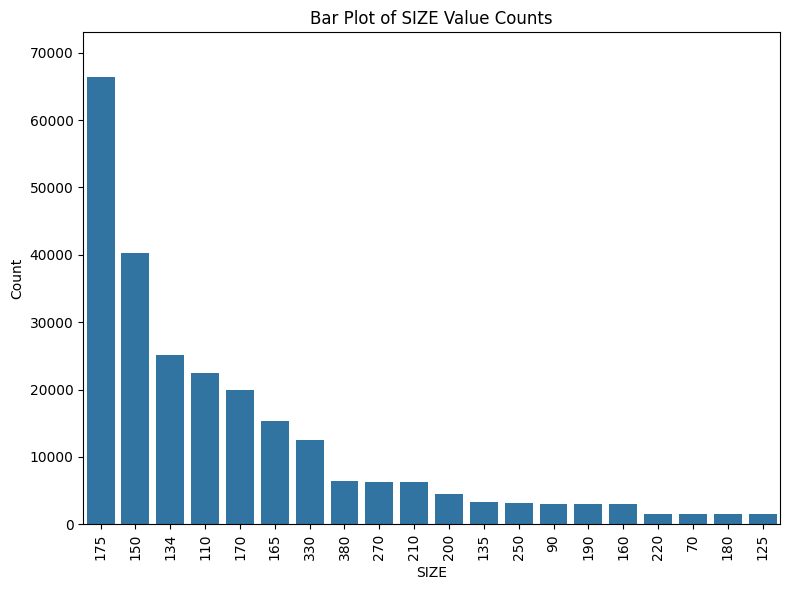

In [19]:
# Visualizing the Size of packets through 
size_counts = transactions['SIZE'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=size_counts.index, y=size_counts.values)
plt.title('Bar Plot of SIZE Value Counts')
plt.xlabel('SIZE')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.ylim(0, max(size_counts.values) * 1.1)
plt.tight_layout()
plt.show()

### Merging both the data

In [20]:
merged_data = transactions.merge(customers,how='left', on='LYLTY_CARD_NBR')

In [21]:
# Checking for null values so we can know the customers who were not matched
print("###### Checking for any Null values in the final dataset ######")
print(merged_data.isna().sum())

###### Checking for any Null values in the final dataset ######
DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
BRAND_NAME          0
SIZE                0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [22]:
# Saving the data set
merged_data.to_csv("QVIdataset.csv", index = False)

### Customer Analysis

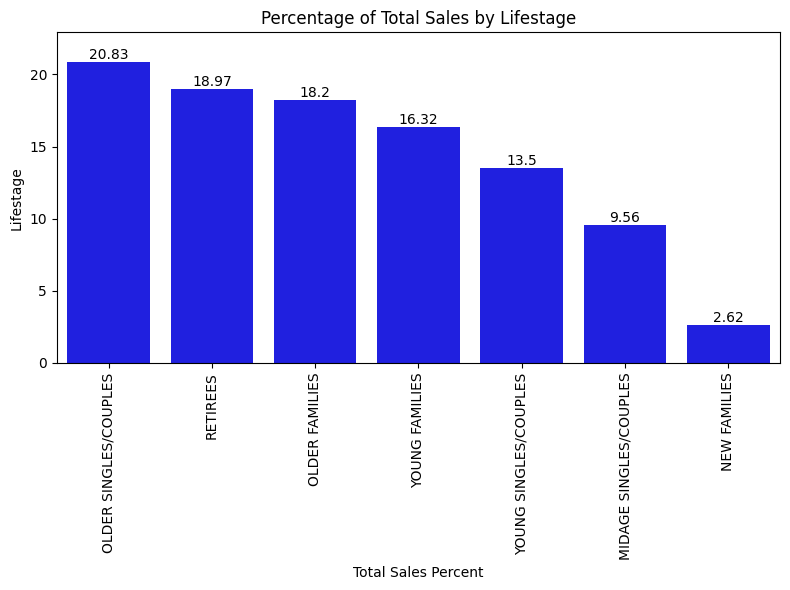

In [23]:
# Visualizing percentage of total sales by lifestage
lt=merged_data.groupby(['LIFESTAGE'])['TOT_SALES'].sum().sort_values(ascending=False)
lt = np.round((lt/lt.sum())*100,2)
plt.figure(figsize=(8, 6))
sns.barplot(x=lt.index, y=lt.values, color='blue')
for index, value in enumerate(lt.values):
    plt.text(index, value, str(value), fontsize=10, ha='center', va='bottom')
plt.title('Percentage of Total Sales by Lifestage')
plt.xlabel('Total Sales Percent')
plt.ylabel('Lifestage')
plt.xticks(rotation=90)
plt.ylim(0, max(lt.values) * 1.1)
plt.tight_layout()
plt.show()

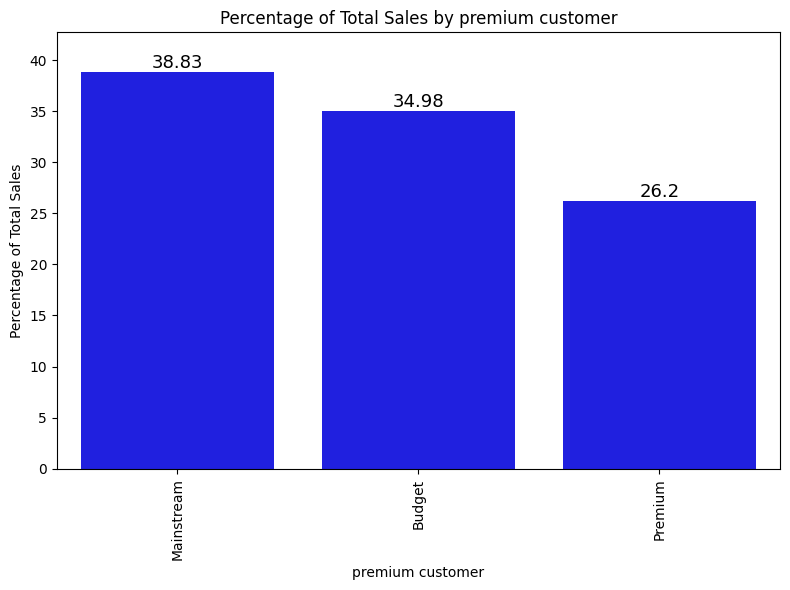

In [24]:
# Visualizing percentage of total sales by premium customer
pt=merged_data.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=False)
pt = np.round((pt/pt.sum())*100,2)
plt.figure(figsize=(8, 6))
sns.barplot(x=pt.index, y=pt.values, color='blue')
for i in range(len(pt)):
    plt.text(i, pt.values[i], str(pt.values[i]), ha='center', va='bottom',fontsize=13)
plt.title('Percentage of Total Sales by premium customer')
plt.xlabel('premium customer')
plt.ylabel('Percentage of Total Sales')
plt.xticks(rotation=90)
plt.ylim(0, max(pt.values) * 1.1)
plt.tight_layout()
plt.show()

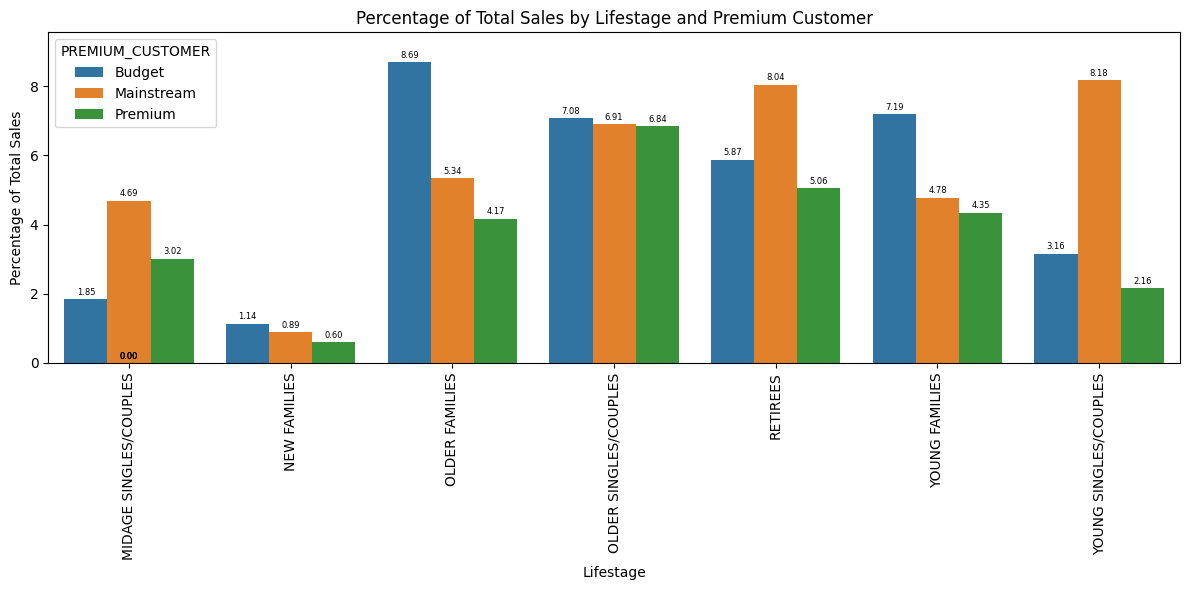

In [25]:
# Visualizing percentage of total sales by lifestage and premium customer
lpt=merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
lpt.TOT_SALES = np.round((lpt.TOT_SALES/lpt.TOT_SALES.sum())*100,2)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=lpt, y='TOT_SALES', x='LIFESTAGE', hue='PREMIUM_CUSTOMER')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=6, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Percentage of Total Sales by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Percentage of Total Sales')
plt.xticks(rotation=90)
plt.ylim(0, max(lpt["TOT_SALES"].values) * 1.1)
plt.tight_layout()
plt.show()

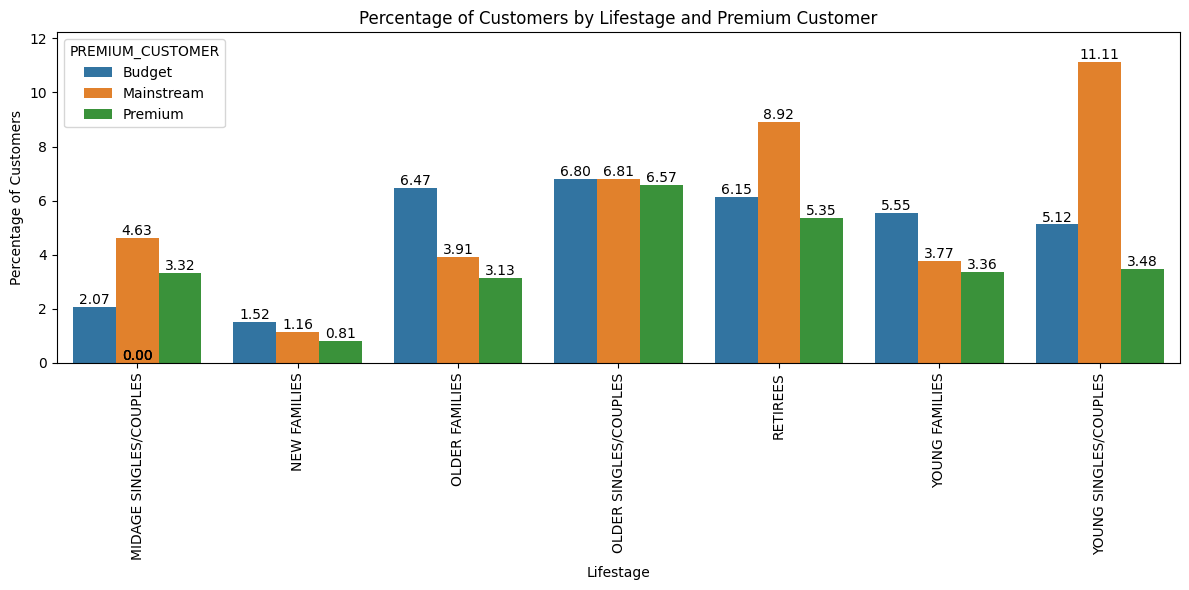

In [26]:
# Visualizing percentage of customers by lifestage and premium customers
lpn=merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
lpn.LYLTY_CARD_NBR = np.round((lpn.LYLTY_CARD_NBR/lpn.LYLTY_CARD_NBR.sum())*100,2)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=lpn, y='LYLTY_CARD_NBR', x='LIFESTAGE', hue='PREMIUM_CUSTOMER')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Percentage of Customers by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=90)
plt.ylim(0, max(lpn["LYLTY_CARD_NBR"].values) * 1.1)
plt.tight_layout()
plt.show()

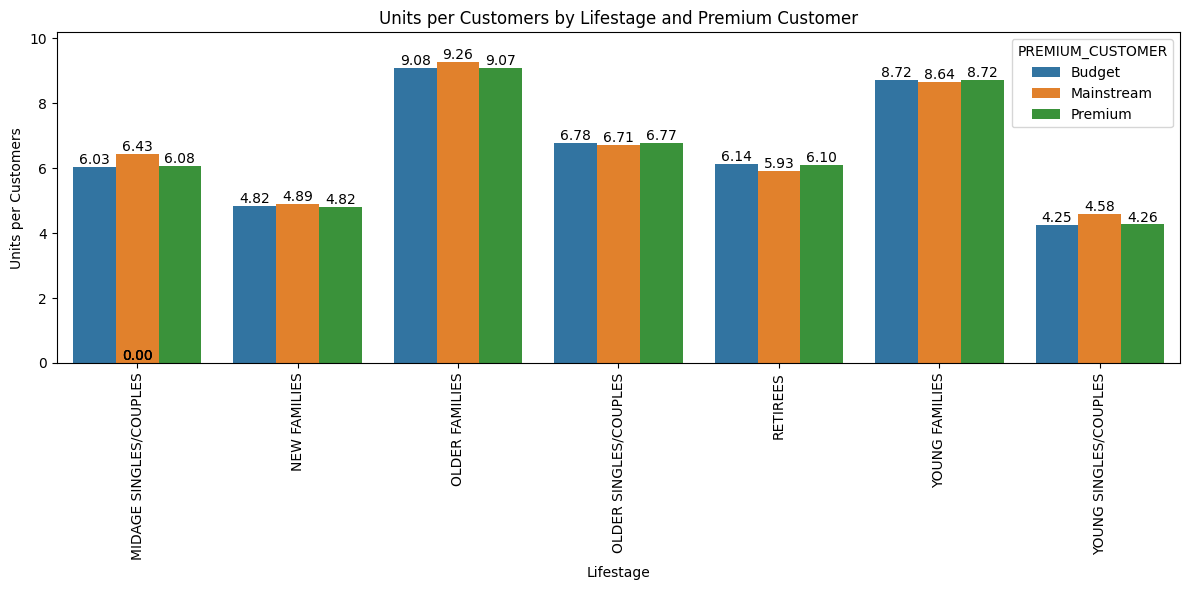

In [27]:
# Visualizing units per customers by lifestage and premium customer
lpu=merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'PROD_QTY': ['sum'], 'LYLTY_CARD_NBR':['nunique']})
lpu['unit_per_customer']=lpu[('PROD_QTY', 'sum')]/lpu[('LYLTY_CARD_NBR', 'nunique')]
lpu=lpu.reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=lpu, y='unit_per_customer', x='LIFESTAGE', hue='PREMIUM_CUSTOMER')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Units per Customers by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Units per Customers')
plt.xticks(rotation=90)
plt.ylim(0, max(lpu["unit_per_customer"].values) * 1.1)
plt.tight_layout()
plt.show()

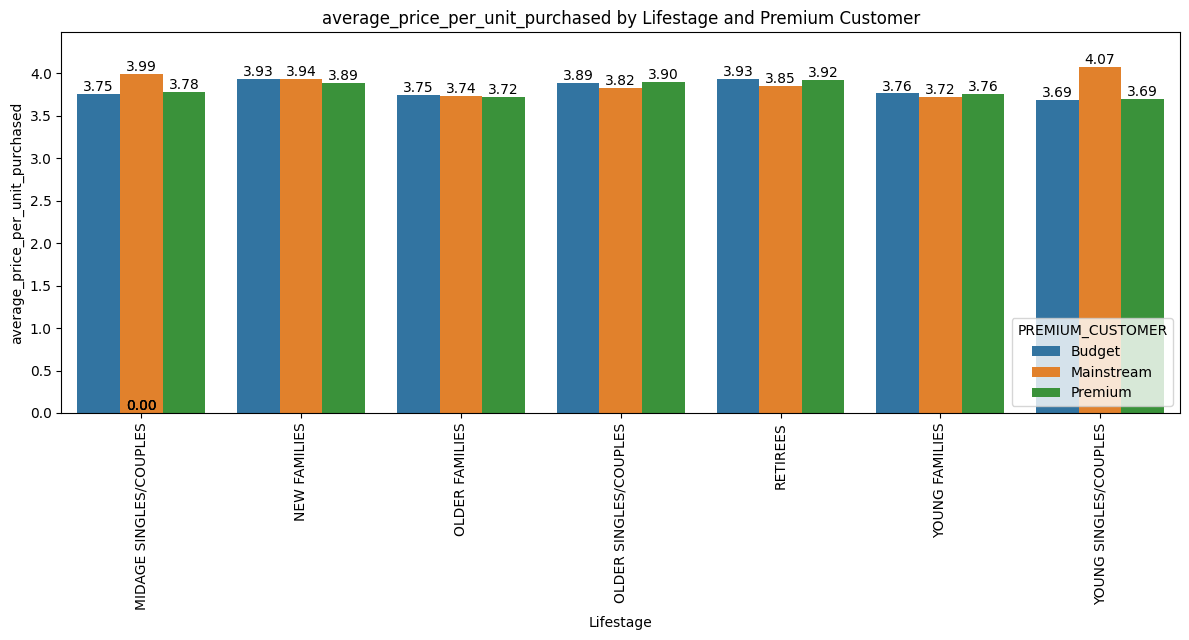

In [28]:
# Visualizing Average price per unit purchased by lifestage and premium customer
lpa=merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TOT_SALES':['sum'],'PROD_QTY': ['sum'], })
lpa['average_price_per_unit_purchased']=lpa[('TOT_SALES', 'sum')]/lpa[('PROD_QTY', 'sum')]
lpa=lpa.reset_index()
plt.figure(figsize=(12, 6.5))
ax = sns.barplot(data=lpa, y='average_price_per_unit_purchased', x='LIFESTAGE', hue='PREMIUM_CUSTOMER')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('average_price_per_unit_purchased by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('average_price_per_unit_purchased')
plt.ylim(0, max(lpa.average_price_per_unit_purchased) * 1.3)
plt.xticks(rotation=90)
plt.ylim(0, max(lpa["average_price_per_unit_purchased"].values) * 1.1)
plt.tight_layout()
plt.show()

In [29]:
# Performing t-test on young singles/couples
young= merged_data[(merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')].copy()
young['unit_price']=young['TOT_SALES']/young['PROD_QTY']
t_statistic, p_value = ttest_ind(young['unit_price'][young['PREMIUM_CUSTOMER'] == 'Mainstream'], 
                                 young['unit_price'][young['PREMIUM_CUSTOMER'] != 'Mainstream'], 
                                 alternative='greater')

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 35.339232724079785
P-Value: 5.4924746573032226e-269


In [30]:
# Performing t-test on midage singles/couples
midage= merged_data[(merged_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')].copy()
midage['unit_price']=midage['TOT_SALES']/midage['PROD_QTY']
t_statistic, p_value = ttest_ind(midage['unit_price'][midage['PREMIUM_CUSTOMER'] == 'Mainstream'], 
                                 midage['unit_price'][midage['PREMIUM_CUSTOMER'] != 'Mainstream'], 
                                 alternative='greater')

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 16.814983102714304
P-Value: 2.2249649794071478e-63


### Product category analysis on preferred and other customers

In [31]:
# Dividing the data into 2 parts : 
# 1]Preferred customers ( three customer segments )
preferred = merged_data[((merged_data['LIFESTAGE'] == 'OLDER FAMILIES' ) & (merged_data['PREMIUM_CUSTOMER'] == 'Budget' )) | ((merged_data['LIFESTAGE'] == 'RETIREES' ) & (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream' )) | ((merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES' ) & (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream' ))].copy()

In [32]:
# Distribution of buying portions of preferred customers
preferred_brand=preferred.groupby(['BRAND_NAME'])['PROD_QTY'].sum()
preferred_brand=(preferred_brand/preferred_brand.sum())*100
preferred_brand=preferred_brand.reset_index()
preferred_brand.rename(columns={'PROD_QTY':'Purchase_Proportion_Preferred'}, inplace=True)
preferred_brand

,BRAND_NAME,Purchase_Proportion_Preferred
0,Burger,0.548572
1,CCs,1.688048
2,Cheetos,1.105784
3,Cheezels,1.911796
4,Cobs,3.968727
5,Dorito,1.321757
6,Doritos,9.368062
7,French,0.514881
8,Grain,2.642650
9,GrnWves,0.587448


In [33]:
# 2]Other customers ( all customers except the three customer segments)
other = merged_data[~(((merged_data['LIFESTAGE'] == 'OLDER FAMILIES' ) & (merged_data['PREMIUM_CUSTOMER'] == 'Budget' )) | ((merged_data['LIFESTAGE'] == 'RETIREES' ) & (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream' )) | ((merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES' ) & (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream' )))].copy()

In [34]:
# Distribution of buyting portions of other customers
other_brand = other.groupby(['BRAND_NAME'])['PROD_QTY'].sum()
other_brand = (other_brand / other_brand.sum()) * 100
other_brand = other_brand.reset_index()
other_brand.rename(columns={'PROD_QTY':'Purchase_Proportion_Other'}, inplace=True)
other_brand

,BRAND_NAME,Purchase_Proportion_Other
0,Burger,0.658407
1,CCs,1.876530
2,Cheetos,1.198385
3,Cheezels,1.842411
4,Cobs,3.941135
5,Dorito,1.291154
6,Doritos,8.847746
7,French,0.577199
8,Grain,2.510405
9,GrnWves,0.587632


In [35]:
# Merging both the distributions
merged_brand = pd.merge(preferred_brand, other_brand, on='BRAND_NAME')

In [36]:
# Calculating affinity
merged_brand['affinity'] = merged_brand.Purchase_Proportion_Preferred/merged_brand.Purchase_Proportion_Other
merged_brand

,BRAND_NAME,Purchase_Proportion_Preferred,Purchase_Proportion_Other,affinity
0,Burger,0.548572,0.658407,0.833182
1,CCs,1.688048,1.876530,0.899558
2,Cheetos,1.105784,1.198385,0.922728
3,Cheezels,1.911796,1.842411,1.037660
4,Cobs,3.968727,3.941135,1.007001
5,Dorito,1.321757,1.291154,1.023702
6,Doritos,9.368062,8.847746,1.058808
7,French,0.514881,0.577199,0.892034
8,Grain,2.642650,2.510405,1.052679
9,GrnWves,0.587448,0.587632,0.999687


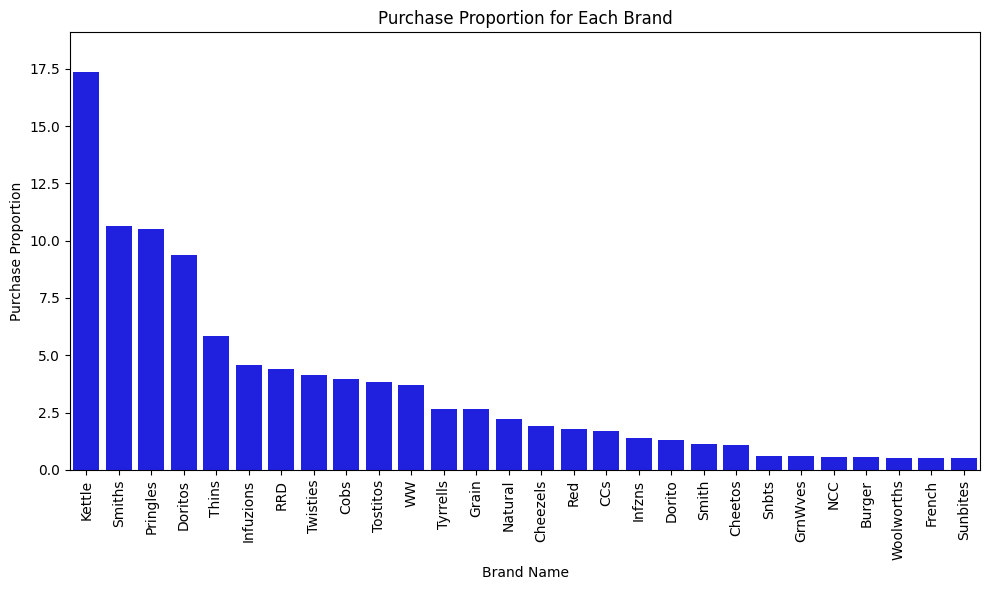

In [37]:
# Visualizing the brand which is most purchased by preferred customers
purchased_brand = merged_brand[['BRAND_NAME','Purchase_Proportion_Preferred']].sort_values('Purchase_Proportion_Preferred',ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='BRAND_NAME', y='Purchase_Proportion_Preferred', data=purchased_brand, color='blue')
plt.xlabel('Brand Name')
plt.ylabel('Purchase Proportion')
plt.title('Purchase Proportion for Each Brand')
plt.xticks(rotation=90)
plt.ylim(0, max(purchased_brand["Purchase_Proportion_Preferred"].values) * 1.1)
plt.tight_layout()
plt.show()

### Product size analysis on preferred and other customers

In [38]:
# Favoured purchase portions by preferred customers 
preferred_size=preferred.groupby(['SIZE'])['PROD_QTY'].sum()
preferred_size=(preferred_size/preferred_size.sum())*100
preferred_size=preferred_size.reset_index()
preferred_size.rename(columns={'PROD_QTY':'Purchase_Proportion_Preferred'}, inplace=True)
preferred_size

,SIZE,Purchase_Proportion_Preferred
0,110,9.374109
1,125,0.546845
2,134,10.527407
3,135,1.348538
4,150,16.309447
5,160,1.066045
6,165,5.933221
7,170,8.197486
8,175,26.371215
9,180,0.587448


In [39]:
# Favoured purchase portions by other customers 
other_size = other.groupby(['SIZE'])['PROD_QTY'].sum()
other_size = (other_size / other_size.sum()) * 100
other_size = other_size.reset_index()
other_size.rename(columns={'PROD_QTY':'Purchase_Proportion_Other'}, inplace=True)
other_size

,SIZE,Purchase_Proportion_Other
0,110,9.018621
1,125,0.591297
2,134,10.103935
3,135,1.311456
4,150,16.293241
5,160,1.232222
6,165,6.255005
7,170,8.064143
8,175,27.052763
9,180,0.587632


In [40]:
# Merging both the dataframes
merged_size = pd.merge(preferred_size, other_size, on='SIZE')

In [41]:
# Calculating affinity
merged_size['affinity'] = merged_size.Purchase_Proportion_Preferred/merged_size.Purchase_Proportion_Other
merged_size

,SIZE,Purchase_Proportion_Preferred,Purchase_Proportion_Other,affinity
0,110,9.374109,9.018621,1.039417
1,125,0.546845,0.591297,0.924822
2,134,10.527407,10.103935,1.041912
3,135,1.348538,1.311456,1.028275
4,150,16.309447,16.293241,1.000995
5,160,1.066045,1.232222,0.865140
6,165,5.933221,6.255005,0.948556
7,170,8.197486,8.064143,1.016535
8,175,26.371215,27.052763,0.974807
9,180,0.587448,0.587632,0.999687


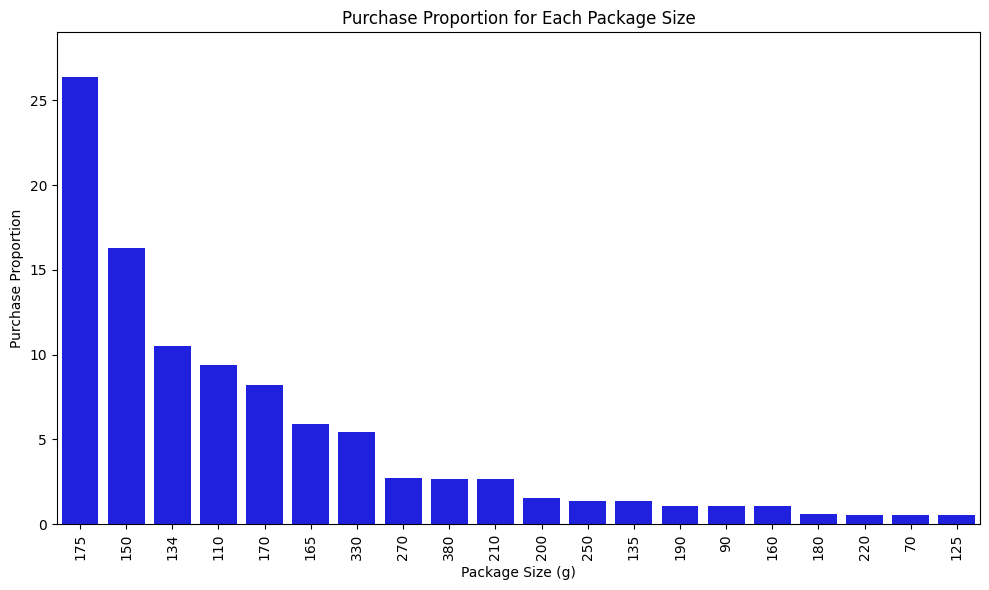

In [42]:
# Visualizing the portion size which is most purchased by preferred customers
purchased_size = merged_size[['SIZE','Purchase_Proportion_Preferred']].sort_values('Purchase_Proportion_Preferred',ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='SIZE', y='Purchase_Proportion_Preferred', data=purchased_size, color='blue')
plt.xlabel('Package Size (g)')
plt.ylabel('Purchase Proportion')
plt.title('Purchase Proportion for Each Package Size')
plt.xticks(rotation=90)
plt.ylim(0, max(purchased_size["Purchase_Proportion_Preferred"].values) * 1.1)
plt.tight_layout()
plt.show()